In [1]:
import pandas as pd
from urllib.parse import urlparse,urlencode
import ipaddress
import re
import requests
from urllib.parse import urlparse

In [8]:
df = pd.read_csv("/content/malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
legitimate_urls = df[df['type'] == 'benign']['url'].tolist()

In [ ]:
print(legitimate_urls)




In [6]:
dfL = pd.DataFrame(legitimate_urls)

In [7]:
print(dfL)


                                                        0
0                     mp3raid.com/music/krizz_kaliko.html
1                         bopsecrets.org/rexroth/cr/1.htm
2       http://buzzfil.net/m/show-art/ils-etaient-loin...
3           espn.go.com/nba/player/_/id/3457/brandon-rush
4          yourbittorrent.com/?q=anthony-hamilton-soulife
...                                                   ...
110585  famoushookups.com/site/relationship_detail.php...
110586  pandora.com/?tc=x-036796-0035-1149&?searchFilt...
110587  beemp3.com/download.php?file=7342110&song=Trou...
110588                  wordiq.com/definition/Faun_Fables
110589  http://persianblog.ir/tags/43343/1/%d9%be%d8%a...

[110590 rows x 1 columns]


In [24]:
phish_urls = df[df['type'] == 'phishing']['url'].tolist()
malware_urls = df[df['type'] == 'malware']['url'].tolist()
defacement_urls = df[df['type'] == 'defacement']['url'].tolist()

phishing_urls = phish_urls + malware_urls + defacement_urls


In [25]:
dfP = pd.DataFrame(phishing_urls)

In [26]:
print(dfP)

                                                        0
0                                        br-icloud.com.br
1              signin.eby.de.zukruygxctzmmqi.civpro.co.za
2       http://www.marketingbyinternet.com/mo/e56508df...
3       https://docs.google.com/spreadsheet/viewform?f...
4                                    retajconsultancy.com
...                                                   ...
122261  http://www.malsaker.nu/lankar/44-turism/17-cyk...
122262  http://rendeck.com/index.php/nl/services/advies.1
122263  http://kizombafestival.pl/index.php?view=artic...
122264  http://www.bruynzeelmultipanel.be/index.php?op...
122265  http://foroalcazares.com/index.php/component/m...

[122266 rows x 1 columns]


*** CHECKING FOR AN IP ADDRESS IN DOMAIN***

In [27]:
def getDomain(url):
  url_str = str(url)
  return re.search('(https?://)?(www\d?\.)?(?P<name>[\w-]+)\.', url_str).group('name')
 #url_str = str(url)
 # domain = urlparse(url_str).netloc
 # if re.match(r"^www.",domain):
   # domain = domain.replace("www.","")

 # return domain
  


In [28]:
def IP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

*** CHECKING FOR HTTPS AND HTTP IN DOMAIN***

In [29]:
def httpDomain(url):
  url_str = str(url)
  domain = urlparse(url_str).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

***CHECKING FOR HYPHEN IN DOMAIN***

In [30]:
def hyphen(url):
    url_str = str(url)
    if '-' in urlparse(url_str).netloc:
        return 1          
    else:
        return 0            

***CHECKING FOR @ symbol IN DOMAIN***

In [31]:
def attherateof(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

***CHECKING THE LENGTH OF AN URL***

In [32]:
def lenofurl(url):
  if len(url) < 72 and len(url)>14:    #as url shortner makes url length to 17 characters 
    length = 0            
  else:
    length = 1            
  return length

***CHECKING FOR NUMBER OF SUBPAGES IN AN URL***

In [33]:
def depth(url):
  url_str = str(url)
  d = urlparse(url_str).path.split('/')
  depth = 0
  for i in range(len(d)):
    if len(d[i]) != 0:
      depth = depth+1
  return depth

***CHECKING FOR // SYMBOL IN AN URL WHICH HELPS TO REDIRECT***

In [34]:
def redirection(url):
  url_str = str(url)
  pos = url_str.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

***CHECKING FOR SHORTNER URL ***

In [35]:
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
     
def tinyURL(url):
    url_str = str(url)
    match=re.search(shortening_services,url_str)
    if match:
        return 1
    else:
        return 0

***CHECKING FOR IFRAME HTML TAG URL***

In [36]:
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[|]", response.text):
          return 0
      else:
          return 1

***CHECKING FOR ONMOUSEOVER EVENT URL***

In [37]:
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("", response.text):
      return 1
    else:
      return 0
     

***CHECKING FOR RIGHT CLICK ENABILATION URL***

In [38]:
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

***CHECKING IF REDIRECTING IS DONE BY AN URL***

In [39]:
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [73]:
%pip install python-whois
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime


def web_traffic(url):
  try:
   
    url_str = str(url)
    url = urlparse(url_str).netloc(url_str)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url_str).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0


def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
def featureExtraction(url,label):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(IP(url))
  features.append(httpDomain(url))
  features.append(hyphen(url))
  features.append(attherateof(url))
  features.append(lenofurl(url))
  features.append(depth(url))
  features.append(redirection(url))
  features.append(tinyURL(url))
  
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript based features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  
  return features
     

In [45]:
legitimate_urls_features = []
label = 0

for i in range(0, 110590):
  
  url_str = dfL.iloc[i]
  legitimate_urls_features.append(featureExtraction(url_str,label))

     

#converting the list to dataframe
feature_names = ['Domain','Have_IP','https_Domain','Prefix/Suffix', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'TinyURL','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','label']

legitimate = pd.DataFrame(legitimate_urls_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [43]:
legitimate.to_csv('legitimate.csv', index= False)

In [46]:
phishing_urls_features = []
label = 1
for i in range(0, 122266):
  url_str = dfP.iloc[i]
  phishing_urls_features.append(featureExtraction(url_str,label))

feature_names = ['Domain','Have_IP','https_Domain','Prefix/Suffix', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'TinyURL','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','label']


phishing = pd.DataFrame(phishing_urls_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,br-icloud,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1
1,signin,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1
2,marketingbyinternet,0,0,0,0,1,4,1,1,1,1,1,1,1,1,1,1,1
3,docs,0,0,0,0,1,4,1,0,1,1,1,1,1,1,1,1,1
4,retajconsultancy,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1


In [47]:
phishing.to_csv('phishing.csv', index= False)

In [48]:
final_data = pd.concat([legitimate, phishing]).reset_index(drop=True)
final_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [49]:
final_data.to_csv('phishing_data.csv', index=False)

In [57]:
import numpy as np 
import pandas as pd 

df_data = pd.read_csv('/content/phishing_data.csv')


In [58]:
import os

df_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [59]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232856 entries, 0 to 232855
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Domain         232856 non-null  object
 1   Have_IP        232856 non-null  int64 
 2   https_Domain   232856 non-null  int64 
 3   Prefix/Suffix  232856 non-null  int64 
 4   Have_At        232856 non-null  int64 
 5   URL_Length     232856 non-null  int64 
 6   URL_Depth      232856 non-null  int64 
 7   Redirection    232856 non-null  int64 
 8   TinyURL        232856 non-null  int64 
 9   DNS_Record     232856 non-null  int64 
 10  Web_Traffic    232856 non-null  int64 
 11  Domain_Age     232856 non-null  int64 
 12  Domain_End     232856 non-null  int64 
 13  iFrame         232856 non-null  int64 
 14  Mouse_Over     232856 non-null  int64 
 15  Right_Click    232856 non-null  int64 
 16  Web_Forwards   232856 non-null  int64 
 17  label          232856 non-null  int64 
dtypes: i

In [60]:
df_data.columns

Index(['Domain', 'Have_IP', 'https_Domain', 'Prefix/Suffix', 'Have_At',
       'URL_Length', 'URL_Depth', 'Redirection', 'TinyURL', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'label'],
      dtype='object')

In [61]:
df_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [62]:
df_data.dropna(subset=['label'], inplace=True)
print(df_data.apply(lambda col: col.unique()))

Domain           [mp3raid, bopsecrets, buzzfil, espn, yourbitto...
Have_IP                                                        [0]
https_Domain                                                   [0]
Prefix/Suffix                                                  [0]
Have_At                                                        [0]
URL_Length                                                     [1]
URL_Depth                          [3, 4, 5, 7, 1, 2, 6, 8, 9, 10]
Redirection                                                 [0, 1]
TinyURL                                                     [0, 1]
DNS_Record                                                     [1]
Web_Traffic                                                    [1]
Domain_Age                                                     [1]
Domain_End                                                     [1]
iFrame                                                         [1]
Mouse_Over                                                    

In [63]:
df_data.dropna(subset=['label'], inplace=True)

In [64]:
df_data.describe()

,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
count,232856.0,232856.0,232856.0,232856.0,232856.0,232856.000000,232856.00000,232856.000000,232856.0,232856.0,232856.0,232856.0,232856.0,232856.0,232856.0,232856.0,232856.000000
mean,0.0,0.0,0.0,0.0,1.0,3.226874,0.48515,0.049451,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.525071
std,0.0,0.0,0.0,0.0,0.0,1.246097,0.49978,0.216809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499372
min,0.0,0.0,0.0,0.0,1.0,1.000000,0.00000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,0.0,0.0,0.0,0.0,1.0,3.000000,0.00000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
50%,0.0,0.0,0.0,0.0,1.0,3.000000,0.00000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
75%,0.0,0.0,0.0,0.0,1.0,4.000000,1.00000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,0.0,0.0,0.0,0.0,1.0,10.000000,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [65]:
x=df_data.drop(['Domain','label'], axis=1) ### Dependent Variables
y=df_data['label']  ### Independent Variables

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.9, random_state = 12)
X_train.shape, X_test.shape
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)
     

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
     



#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
     

Decision Tree: Accuracy on training Data: 0.951
Decision Tree: Accuracy on test Data: 0.950


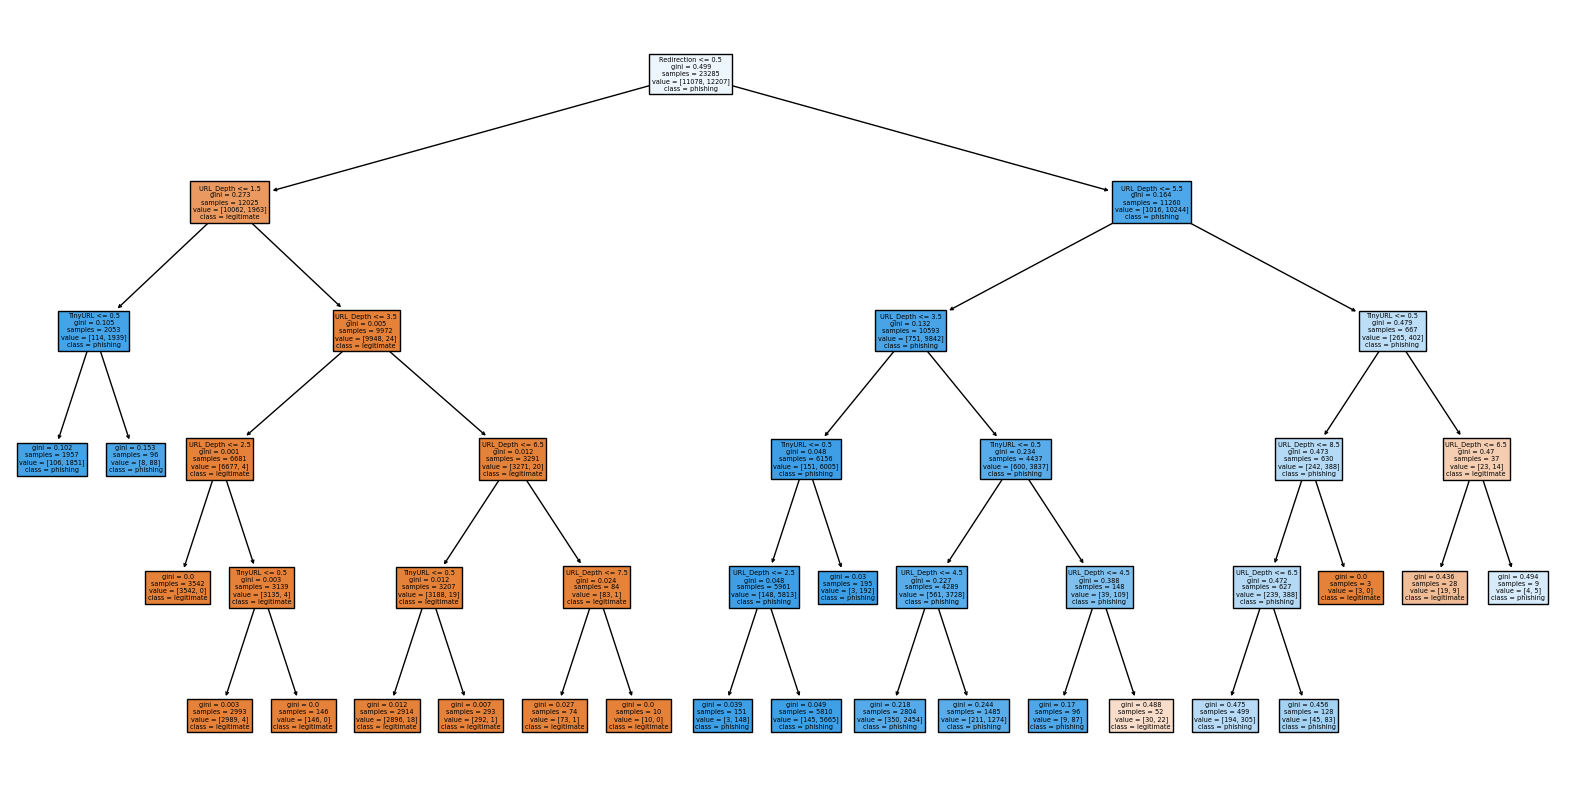

In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=x.columns, class_names=['legitimate', 'phishing'], filled=True)
plt.show()


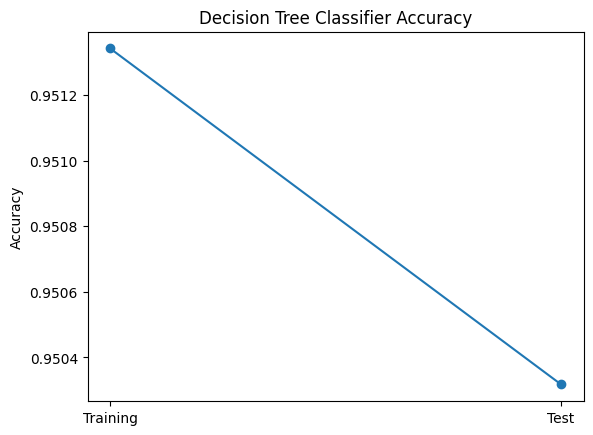

In [71]:
import matplotlib.pyplot as plt

# plot the accuracy scores for training and test sets
plt.plot([acc_train_tree, acc_test_tree], marker='o')
plt.xticks([0, 1], ['Training', 'Test'])
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()


In [ ]:
x_new ="http://www.paypal.com.secure.loginauthentication.com"
tree.predict(x_new)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.pipeline import Pipeline
pipe=Pipeline([('sc',StandardScaler()),
               ('pca',PCA()),
               ('svmr',LogisticRegression()),])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(df_data.drop(['Domain','label'], axis=1),df_data['label'],test_size=0.9)
pipe.fit(xtrain,ytrain)
print(pipe.score(xtrain,ytrain))
print(pipe.score(xtest,ytest))

0.9427528451793
0.941385019873933
